In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from LinearRegression import LinearRegression
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv(r"C:\Users\KRISH DIDWANIA\Documents\CarPrice_Assignment.csv")
y=df["price"]
x=df.drop(["car_ID","price"],axis=1)
x.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

In [80]:
le=LabelEncoder()
x["CarName"]=le.fit_transform(x["CarName"])
x["fueltype"]=le.fit_transform(x["fueltype"])
x["aspiration"]=le.fit_transform(x["aspiration"])
x["doornumber"]=le.fit_transform(x["doornumber"])
x["carbody"]=le.fit_transform(x["carbody"])
x["drivewheel"]=le.fit_transform(x["drivewheel"])
x["enginelocation"]=le.fit_transform(x["enginelocation"])
x["enginetype"]=le.fit_transform(x["enginetype"])
x["cylindernumber"]=le.fit_transform(x["cylindernumber"])
x["fuelsystem"]=le.fit_transform(x["fuelsystem"])
x

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,2,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,1,0,1,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,4,1,0,0,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,5,1,0,0,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


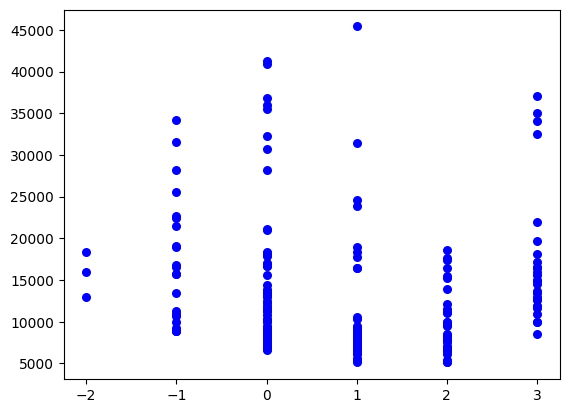

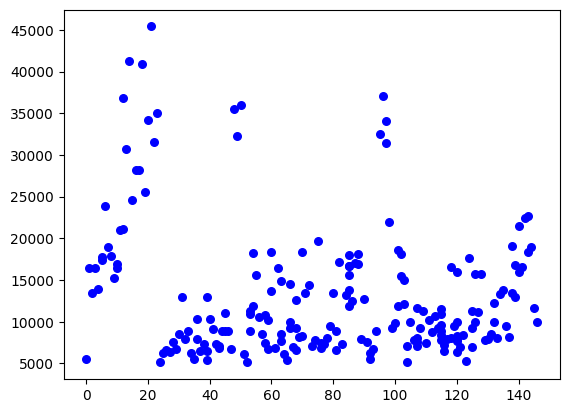

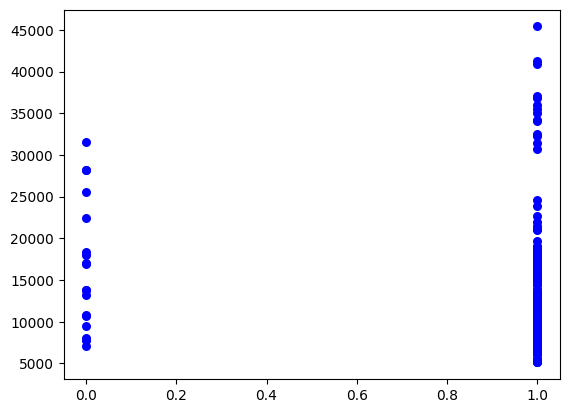

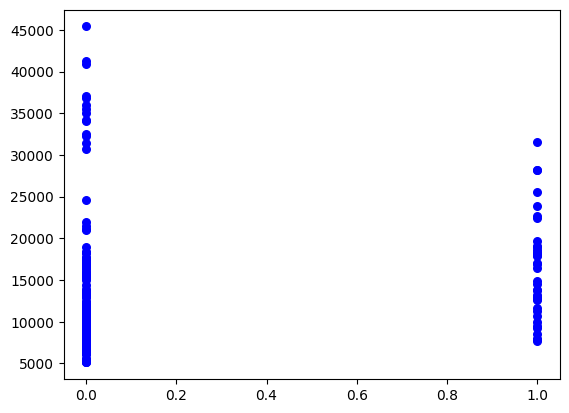

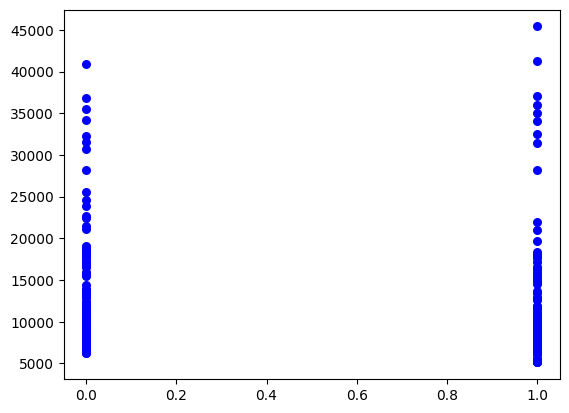

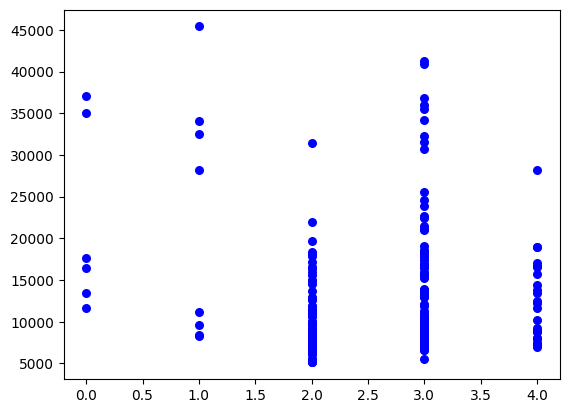

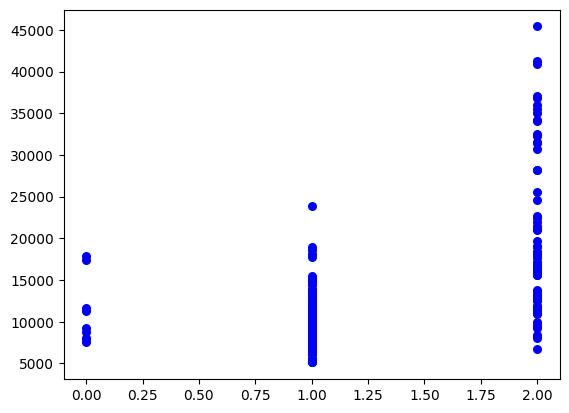

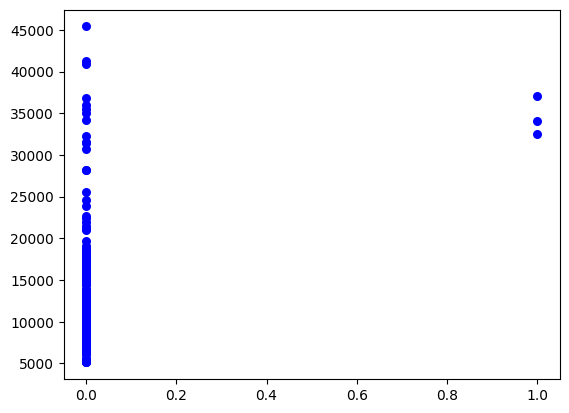

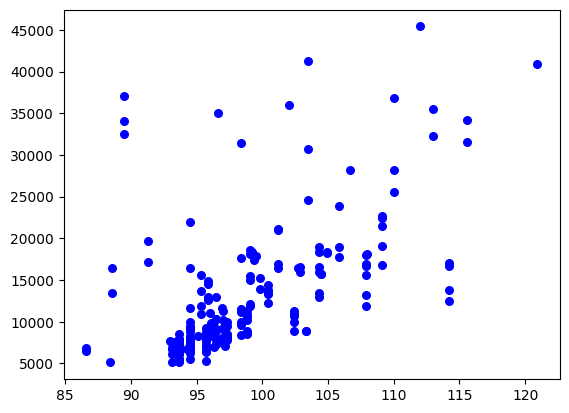

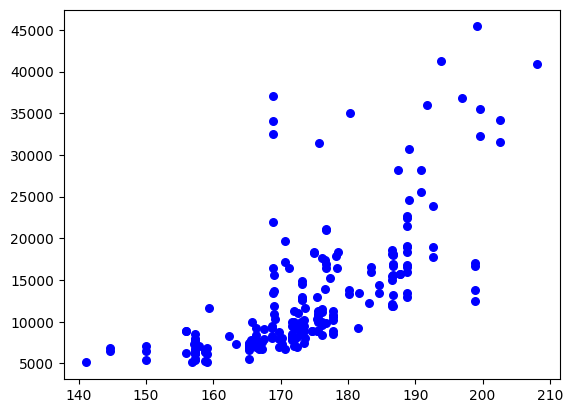

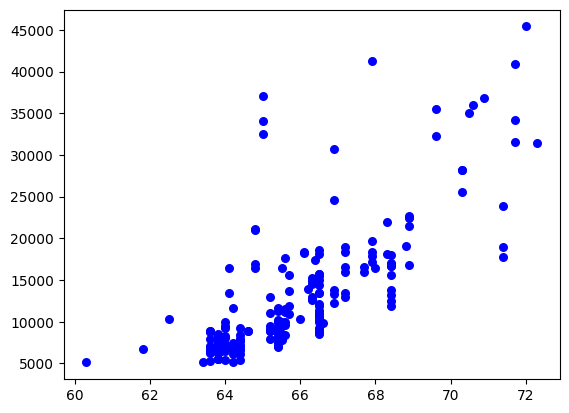

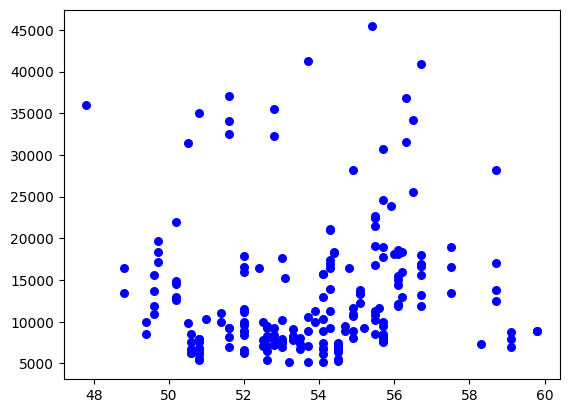

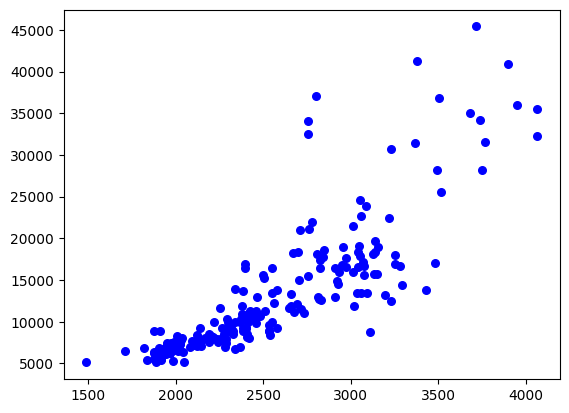

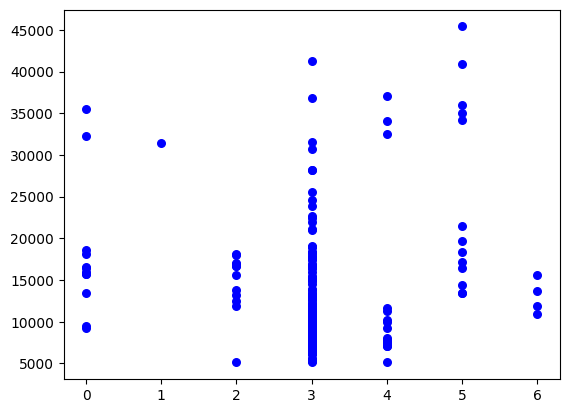

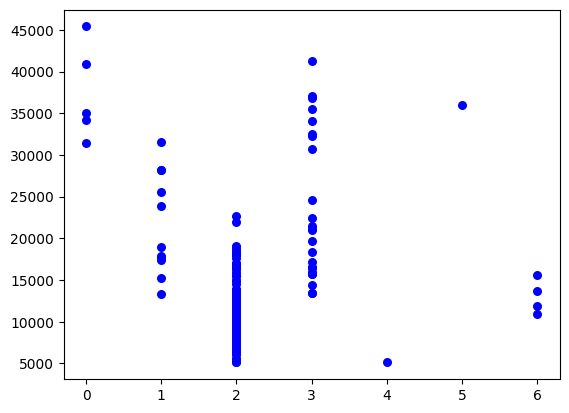

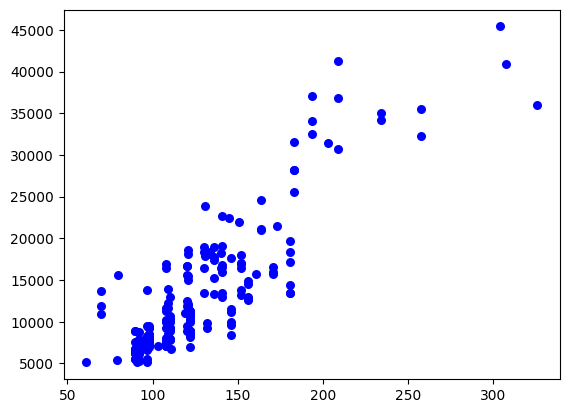

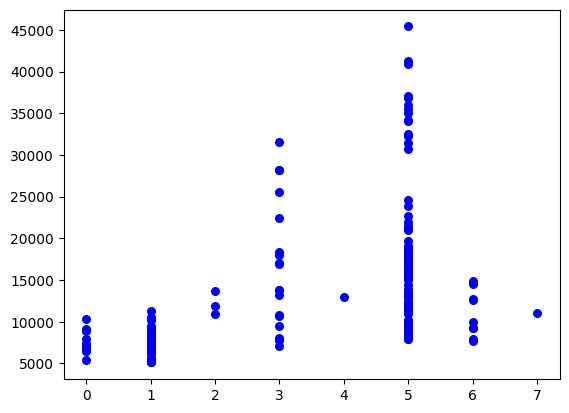

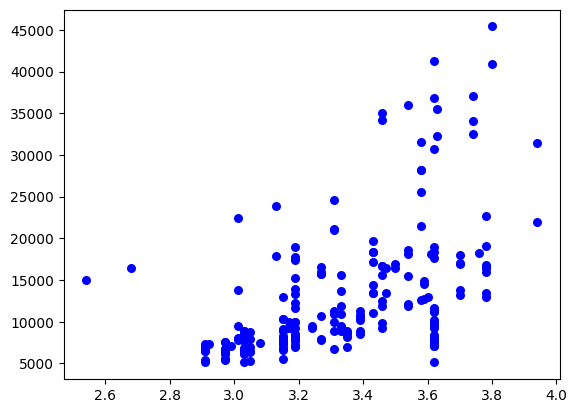

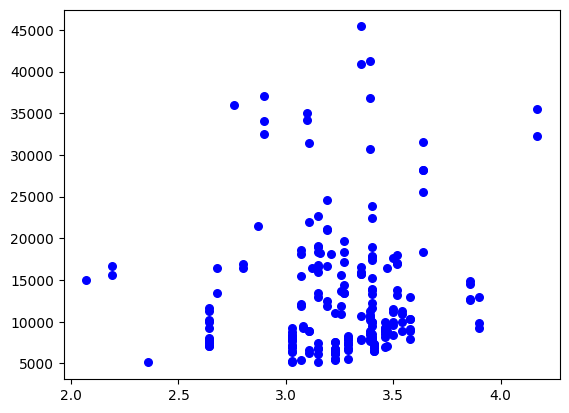

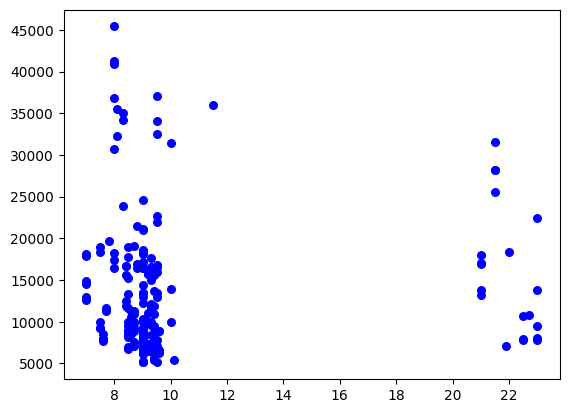

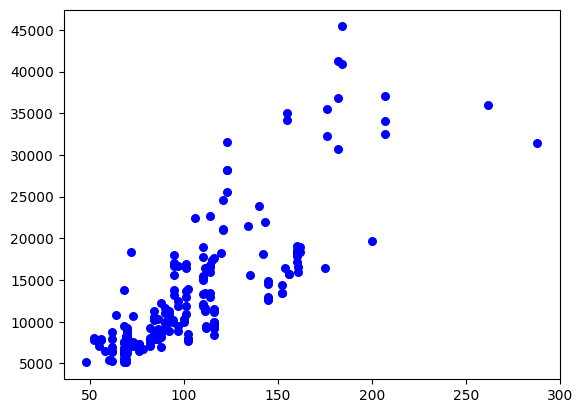

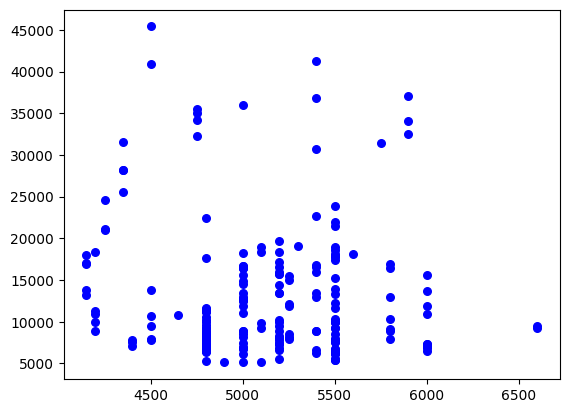

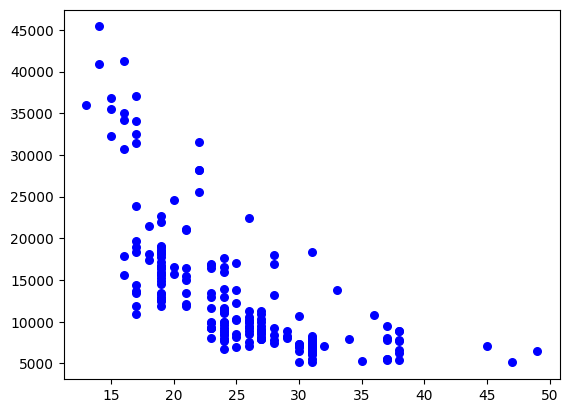

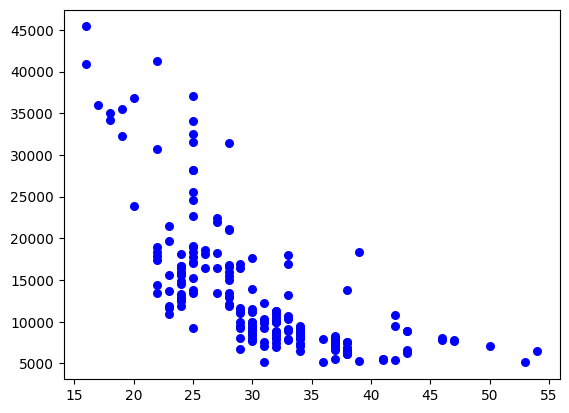

IndexError: single positional indexer is out-of-bounds

In [81]:

for index in range(25):
    plt.scatter(x.iloc[:,index],y,color='b',marker='o',s=30)
    plt.show()
    

In [ ]:
def normalize_z(dfin):
    dfout = (dfin - dfin.mean(axis=0))/dfin.std(axis=0)
    return dfout

x=normalize_z(x)
x

In [ ]:
x_train=x[:150]
x_test=x[150:]
y_train=y[:150]
y_test=y[150:]
x_train

In [86]:
class LinearRegression:
    
    def __init__(self,learning_rate=0.05,iterations=5000):
        self.learning_rate=learning_rate
        self.iterations=iterations
        self.weights=0
        self.bias=0
     
    def mse(y,y_hat):
        error=0
        for i in range(len(y)):
            error+=(y[i]-y_hat[i])**2
        error=error/len(y)
        return error
    
    def fit(self,x,y):
        self.weight=np.zeros(x.shape[1])
        self.bias=0
        for i in range(self.iterations):
            y_hat=np.dot(x,self.weight)+self.bias
            partial_w=(1/x.shape[0])*(2*np.dot(x.T,(y_hat-y)))
            partial_b=(1/x.shape[0])*(2*np.sum(y_hat-y))
            self.weight-=self.learning_rate*partial_w
            self.bias-=self.learning_rate*partial_b
            
            
    
    def predict(self,x):
        return (np.dot(self.weight,x.T)+self.bias)
    
    


In [87]:
    model= LinearRegression()
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    print(preds)
    error=model.mse(preds,y_test)
    print(error)

[ 2821.41330313  2900.36354521  4049.5326447   2612.71546347
  1822.88996035  2533.6214884   3497.44801513  4993.57995659
  5320.08408049  7063.74262532  4933.58788112  5003.02191691
  3457.53112415  4252.12861774  4723.59543346 10641.33280081
 10824.37779838 12809.49084957 13514.99608572 11872.64560619
 12462.54453024 13036.2218613  13666.7725958   8380.52487422
  8346.61961616  8268.26783138  8316.59007404  7865.07085453
 21518.30702971 21314.62635487 18814.81154596 17103.7575219
  5879.43926271  6985.83567873  6299.67470195  7117.64929982
  7743.0733993   5120.55570321  8374.43920728  7312.93962478
  5209.57214887 10810.41069697  5459.26306511  8092.22740227
 14123.99613805 14329.63289871 14154.79499412 14164.55513908
 13431.21569567 13442.1743085  16618.67736507 17542.69363572
 20765.21718277 14854.25310737 15063.34932623]


TypeError: LinearRegression.mse() takes 2 positional arguments but 3 were given

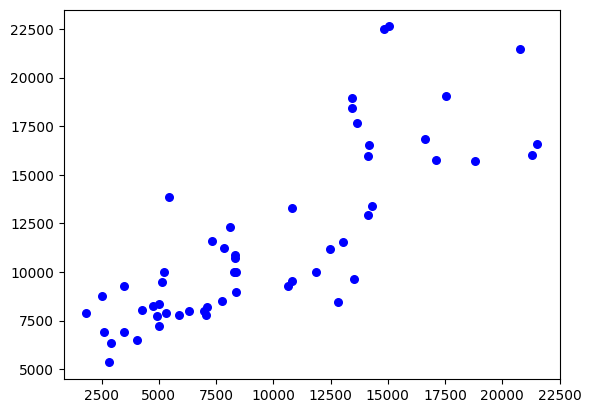

In [89]:
plt.scatter(preds,y_test,color='b',marker='o',s=30)
plt.show()